<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-02/LAB_02_Regresi%C3%B3n_Log%C3%ADstica_SIS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB-02 - Regresión Logística
## Nombre: Quispe Sucullani Jose David
## Nombre: Ovando Jesus Adrian
## Carrera: Ing. de Ciencias de la computacion
## C.U. 111-376
## CU. 111-340


Link del Dataset: https://www.kaggle.com/datasets/nathanlauga/nba-games
Link del repositorio : https://gitlab.com/josesucullani/inteligencia-artificial/-/tree/main/Laboratorio/SegundoLAB?ref_type=heads
link del drive : https://drive.google.com/drive/folders/1BLb-nzTMYrjLocxdR8SwGasuer42xVHl?usp=drive_link


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## **Información del Dataset**


**Temática:**  **El objetivos es predecir si el equipo de NBA gana o no en un partido de local **


**Variables de entrada:** GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS

Variable de salida (Y predicha):Y-> HOME_TEAM_WINS, donde es nuestro y predicha que calcula el SI/NO del resultado de victoria del partido.


In [3]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
data = pd.read_csv('/content/drive/MyDrive/IA/LABORATORIOS/2DOLAB/games.csv', delimiter=',')


In [4]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 30)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [5]:
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


# **PREPARAMOS EL DATASET**

In [6]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away

In [10]:
#Sacamos los valores minimos y maximos de cada columna que necesite rellenar los datos
print("PTS_home")
print(data['PTS_home'].min())
print(data['PTS_home'].max())

print("FG_PCT_home")
print(data['FG_PCT_home'].min())
print(data['FG_PCT_home'].max())

print("FT_PCT_home")
print(data['FT_PCT_home'].min())
print(data['FT_PCT_home'].max())

print("FG3_PCT_home")
print(data['FG3_PCT_home'].min())
print(data['FG3_PCT_home'].max())

print("AST_home")
print(data['AST_home'].min())
print(data['AST_home'].max())

print("REB_home")
print(data['REB_home'].min())
print(data['REB_home'].max())

print("PTS_away")
print(data['PTS_away'].min())
print(data['PTS_away'].max())

print("FG_PCT_away")
print(data['FG_PCT_away'].min())
print(data['FG_PCT_away'].max())

print("FT_PCT_away")
print(data['FT_PCT_away'].min())
print(data['FT_PCT_away'].max())

print("FG3_PCT_away")
print(data['FG3_PCT_away'].min())
print(data['FG3_PCT_away'].max())

print("AST_away")
print(data['AST_away'].min())
print(data['AST_away'].max())

print("REB_away")
print(data['REB_away'].min())
print(data['REB_away'].max())

PTS_home
36.0
168.0
FG_PCT_home
0.25
0.684
FT_PCT_home
0.143
1.0
FG3_PCT_home
0.0
1.0
AST_home
6.0
50.0
REB_home
15.0
72.0
PTS_away
33.0
168.0
FG_PCT_away
0.244
0.687
FT_PCT_away
0.143
1.0
FG3_PCT_away
0.0
1.0
AST_away
4.0
46.0
REB_away
19.0
81.0


In [11]:
#Reemplazamos todos los valores NaN de las columnas que tenian campos faltantes

import numpy as np

for i in range(len(data)):
    if pd.isna(data.at[i, 'PTS_home']):
        data.at[i, 'PTS_home'] = np.random.randint(36, 167 + 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FG_PCT_home']):
        data.at[i, 'FG_PCT_home'] = np.random.randint(0.25, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FT_PCT_home']):
        data.at[i, 'FT_PCT_home'] = np.random.randint(0.14, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FG3_PCT_home']):
        data.at[i, 'FG3_PCT_home'] = np.random.randint(0, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'AST_home']):
        data.at[i, 'AST_home'] = np.random.randint(6, 50)

for i in range(len(data)):
    if pd.isna(data.at[i, 'REB_home']):
        data.at[i, 'REB_home'] = np.random.randint(15, 72)

for i in range(len(data)):
    if pd.isna(data.at[i, 'PTS_away']):
        data.at[i, 'PTS_away'] = np.random.randint(33, 168)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FG_PCT_away']):
        data.at[i, 'FG_PCT_away'] = np.random.randint(0.24, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FT_PCT_away']):
        data.at[i, 'FT_PCT_away'] = np.random.randint(0.14, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'FG3_PCT_away']):
        data.at[i, 'FG3_PCT_away'] = np.random.randint(0, 1)

for i in range(len(data)):
    if pd.isna(data.at[i, 'AST_away']):
        data.at[i, 'AST_away'] = np.random.randint(4, 46)

for i in range(len(data)):
    if pd.isna(data.at[i, 'REB_away']):
        data.at[i, 'REB_away'] = np.random.randint(19, 81)



In [12]:
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder

#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [13]:
#Verificamos todos los datos del Dataset

print("\nTIPOS DE DATOS")
data.info()
print("\nDATOS VACIOS")
print(pd.isnull(data).sum())


TIPOS DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GAME_DATE_EST   26651 non-null  int64  
 1   SEASON          26651 non-null  int64  
 2   PTS_home        26651 non-null  float64
 3   FG_PCT_home     26651 non-null  float64
 4   FT_PCT_home     26651 non-null  float64
 5   FG3_PCT_home    26651 non-null  float64
 6   AST_home        26651 non-null  float64
 7   REB_home        26651 non-null  float64
 8   PTS_away        26651 non-null  float64
 9   FG_PCT_away     26651 non-null  float64
 10  FT_PCT_away     26651 non-null  float64
 11  FG3_PCT_away    26651 non-null  float64
 12  AST_away        26651 non-null  float64
 13  REB_away        26651 non-null  float64
 14  HOME_TEAM_WINS  26651 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 3.1 MB

DATOS VACIOS
GAME_DATE_EST     0
SEASON            0
PTS_h

In [14]:
# Mostramos los datos ya actualizados, preparados para predecir
data

,GAME_DATE_EST,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,4303,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,4303,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,4302,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,4302,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,4302,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2450,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2450,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2450,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2449,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [15]:
data.shape

(26651, 15)

## 1 Regresion Logistica

Conjunto de datos con todos los partidos de la NBA desde la temporada 2004 hasta diciembre 2020
En esta parte del ejercicio, creará un modelo de regresión logística para predecir los partidos del Equipo de NBA si todos sus partidos de local fueron ganadas(Si) o fue derrotas(No).

Para los partidos jugados de local se necesita registros que seran evaluados en el transcurso del proceso.

Los datos que se conocen son: FG_PCT_home, FT_PCT_home,	FG3_PCT_home,	AST_home,	REB_home,	TEAM_ID_away,	PTS_away,	FG_PCT_away,	FT_PCT_away,	FG3_PCT_away,	AST_away,	REB_away,	HOME_TEAM_WINS.

El modelo que debemos aplicar es Regresión logistica donde calcularemos la probabilidad si el equipo del BNA ganó partidos de local (Si/No).

La siguiente celda cargará los datos y las etiquetas correspondientes:

## **Dividimos el dataset para diferentes pruebas **

Dividimos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [16]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
# X_train, X_test, y_train, y_test = train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Separamos en X_test los datos, que seran solo las X, pero sin nuestra y que seria 'HOME_TEAM_WINS'
# X_test = test_data.drop(['HOME_TEAM_WINS'], axis=1).values
# Cargamos nuestra Y en y_test donde sera nuestra y predicha
# y_test = test_data['HOME_TEAM_WINS'].values

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :14]
y_test = test_data.iloc[:, 14]

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.iloc[:, :14]
y_train = train_data.iloc[:, 14]
m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
       GAME_DATE_EST  SEASON  PTS_home  FG_PCT_home  FT_PCT_home  \
23779           2914    2016      98.0        0.435        0.857   
9350            1607    2010      96.0        0.493        0.639   
24255           2812    2015     128.0        0.528        1.000   
25105           2699    2015      98.0        0.375        0.500   
23480           2957    2016     107.0        0.494        0.667   
...              ...     ...       ...          ...          ...   
21575           3250    2017      97.0        0.414        0.842   
5390            2238    2013     101.0        0.453        0.757   
860             4148    2021     134.0        0.558        0.710   
15795            557    2005     112.0        0.535        0.875   
23654           2935    2016      99.0        0.398        0.800   

       FG3_PCT_home  AST_home  REB_home  PTS_away  FG_PCT_away  FT_PCT_away  \
23779         0.333      23.0      51.0      86.0        0.347        0.765   
9350   

# **---------------------------------------------------------------------------------------------**

## 1.1 **Visualizar los datos en la gráfica**

In [17]:
import matplotlib.pyplot as plt

def plotData(X, y):
  # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
  # o para los negativos.

  # Crear una nueva figura
  fig = plt.figure()

  # Encontrar indices de positivos y negativos
  pos = y == 1
  neg = y == 0

  plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
  plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


In [18]:
# Para verificar en que posicione esta una columna
posicion_columna = X_train.columns.get_loc('PTS_away')
print(f"La columna está en la posición {posicion_columna} en el DataFrame X_train.")


La columna está en la posición 8 en el DataFrame X_train.


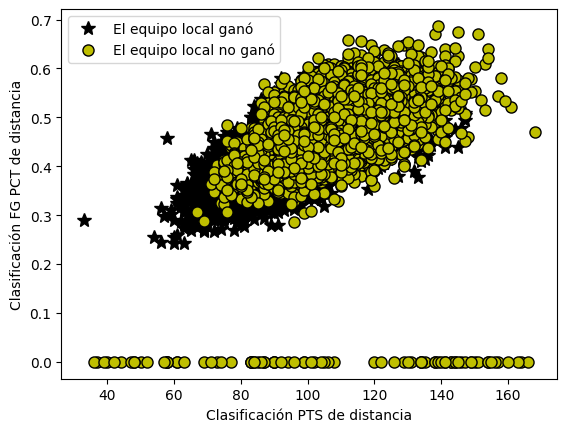

In [19]:
# Lamamos a la funcion implementada para mostrar los datos
# PTS_away	FG_PCT_away	FT_PCT_away	FG3_PCT_away	AST_away	REB_away
plotData(X_train.iloc[:, 8:10].values, y_train.values)

# Adicionamos etiquetas para los ejes
plt.xlabel('Clasificación PTS de distancia')
plt.ylabel('Clasificación FG PCT de distancia')
plt.legend(['El equipo local ganó', 'El equipo local no ganó'])
pass

In [20]:
# Para verificar en que posicione esta una columna
posicion_columna = X_train.columns.get_loc('FT_PCT_away')
print(f"La columna está en la posición {posicion_columna} en el DataFrame X_train.")

La columna está en la posición 10 en el DataFrame X_train.


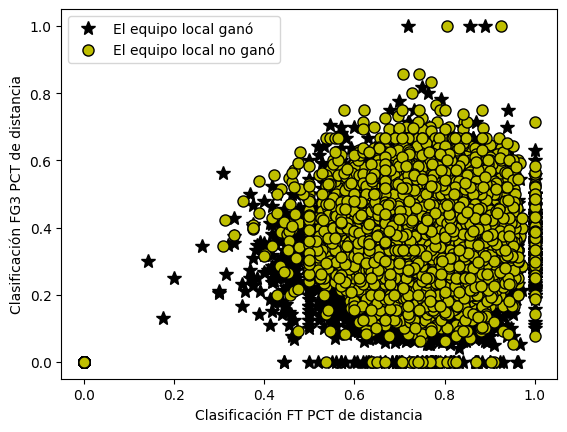

In [21]:
# Lamamos a la funcion implementada para mostrar los datos
plotData(X_train.iloc[:, 10:12].values, y_train.values)

# Adicionamos etiquetas para los ejes
plt.xlabel('Clasificación FT PCT de distancia')
plt.ylabel('Clasificación FG3 PCT de distancia')
plt.legend(['El equipo local ganó', 'El equipo local no ganó'])
pass

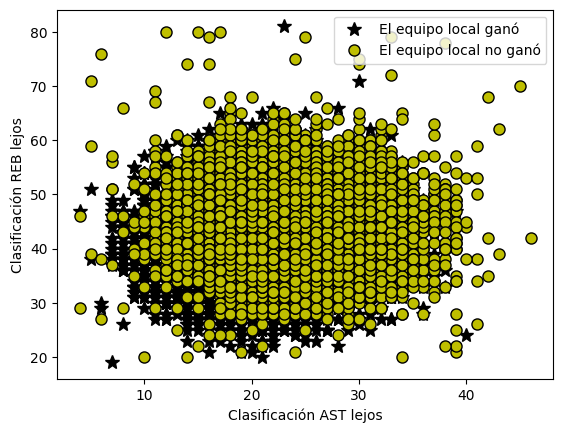

In [22]:
# Lamamos a la funcion implementada para mostrar los datos
plotData(X_train.iloc[:, 12:14].values, y_train.values)

# Adicionamos etiquetas para los ejes
plt.xlabel('Clasificación AST lejos')
plt.ylabel('Clasificación REB lejos')
plt.legend(['El equipo local ganó', 'El equipo local no ganó'])
pass

# **1.2 IMPLEMENTACIÓN**

## **1.2.1 Normalización de los datos:**

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [23]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [24]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm, mu, sigma = featureNormalize(X_train)

In [25]:
# Mostramos la media de cada caracteristica de X_train
mu

,0
GAME_DATE_EST,2136.762758
SEASON,2012.115854
PTS_home,103.430159
FG_PCT_home,0.458904
FT_PCT_home,0.756793
FG3_PCT_home,0.354546
AST_home,22.866698
REB_home,43.389118
PTS_away,100.673452
FG_PCT_away,0.447865


In [26]:
# Mostramos la desviasión estandar de cada caracteristica de X_train
sigma

,0
GAME_DATE_EST,1240.831875
SEASON,5.590958
PTS_home,13.457981
FG_PCT_home,0.063144
FT_PCT_home,0.110914
FG3_PCT_home,0.112940
AST_home,5.220707
REB_home,6.687328
PTS_away,13.682226
FG_PCT_away,0.062190


In [27]:
# Mostramos los datos normalizados
X_norm

,GAME_DATE_EST,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
23779,0.626384,0.694719,-0.403490,-0.378566,0.903468,-0.190774,0.025533,1.138105,-1.072446,-1.621880,0.085743,-0.706344,-1.059866,1.182603
9350,-0.426942,-0.378442,-0.552101,0.539962,-1.062022,0.269646,-1.123736,-0.058187,-0.707009,-0.480217,0.270763,-1.325442,-0.675581,0.124144
24255,0.544181,0.515859,1.825671,1.094247,2.192758,0.057145,2.132528,-0.058187,0.023867,-1.123407,-0.460507,-0.392308,-0.483438,1.636228
25105,0.453113,0.515859,-0.403490,-1.328768,-2.315248,-1.244426,-0.932191,2.633471,-0.487746,-0.689254,-0.213813,-0.266694,-0.675581,1.182603
23480,0.661038,0.694719,0.265258,0.555799,-0.809574,0.004019,-0.932191,-0.656334,0.681654,0.950880,0.552699,0.110149,0.285132,-1.236732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.897170,0.873580,-0.477795,-0.711137,0.768228,-0.722027,-0.740646,-1.703090,2.070317,1.915666,-0.434075,1.518822,1.630129,1.333811
5390,0.081588,0.158139,-0.180574,-0.093506,0.001867,-1.129321,-0.549102,0.091349,-0.268484,-0.512377,0.341247,-0.778123,-1.444151,-1.236732
860,1.620878,1.589020,2.271503,1.569348,-0.421885,0.313917,-0.357557,0.091349,1.777967,0.838322,0.896307,0.415212,1.053702,-1.387940
15795,-1.273148,-1.272743,0.636785,1.205104,1.065756,0.659232,1.557893,0.091349,-1.584059,-0.850052,-0.777684,-0.482033,-0.291296,-1.690357


Agregamos la columna de unos (1) en X_train para completar los valores para theta 0

In [28]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m, n = X_train.shape

# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [29]:
# Mostramos el data de X_train ya concatenado con la columna de unos
X_ready

array([[ 1.        ,  0.62638401,  0.69471929, ..., -0.70634378,
        -1.05986594,  1.18260293],
       [ 1.        , -0.42694161, -0.37844206, ..., -1.32544234,
        -0.67558095,  0.12414409],
       [ 1.        ,  0.54418109,  0.51585907, ..., -0.39230828,
        -0.48343845,  1.63622815],
       ...,
       [ 1.        ,  1.62087812,  1.58902042, ...,  0.41521158,
         1.05370152, -1.38793998],
       [ 1.        , -1.27314811, -1.27274319, ..., -0.48203271,
        -0.29129596, -1.69035679],
       [ 1.        ,  0.64330814,  0.69471929, ..., -0.67045401,
         0.47727403,  0.27535249]])

# **1.3 FUNCIÓN SIGMOIDEA**

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1.
Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [30]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [31]:
print(sigmoid(0))

0.5


In [32]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


# **1.2.2 FUNCIÓN DE COSTO Y GRADIENTE**

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

## **Cálculo del costo  J(θ)**

In [33]:
# La funcion de costo en una regresión logistica es:
def calcularCosto(theta, X, y):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))

  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

  return J

## Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la **sigmoid()**

In [34]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
  m = y.shape[0]

  # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = sigmoid(X.dot(theta.T))
    theta = theta - (alpha / m) * (h - y).dot(X)

    J_history.append(calcularCosto(theta, X, y))
  return theta, J_history

Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

thetas calculados por el descenso por el gradiente: [ 0.70742027 -0.00233556 -0.00549406  1.47349553  0.99005259  0.36914598
  0.37986512  0.24830384  0.45310015 -1.63189503 -0.69570064 -0.17477878
 -0.31305184 -0.33506967 -0.3118685 ]
Con un costo de: 0.2194072581465143 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

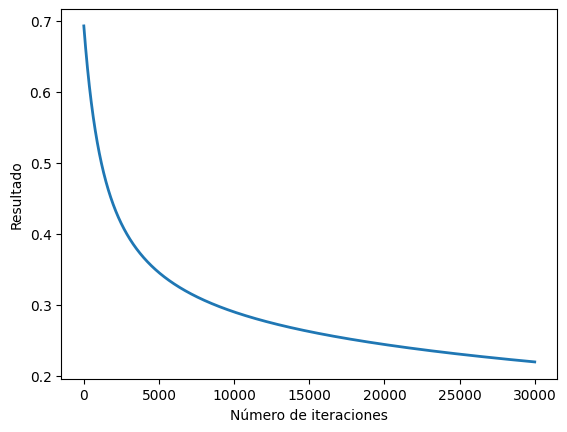

In [35]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 30000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta)))
print('=' * 100)
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history[-1]} ")



print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

Realizando algunas pruebas de que el equipo gana o no en un partido de local.

In [36]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 4302,	2022,	113.0,	0.441,	0.909,	0.297,	27.0,	49.0,	93.0,	0.392,	0.735,	0.261,	15.0,	46.0]
resuldato = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"El equipo de la NBA con las siguientes datos: {X_array}")
print('El equipo tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

El equipo de la NBA con las siguientes datos: [1, 4302, 2022, 113.0, 0.441, 0.909, 0.297, 27.0, 49.0, 93.0, 0.392, 0.735, 0.261, 15.0, 46.0]
El equipo tiene como probabilidad de ganar el partido de local: 1


In [37]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 2448,	2014,	86.0,	0.431,	0.679,	0.333,	18.0,	42.0,	98.0,	0.462,	0.706,	0.438,	19.0,	42.0]
resuldato = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"El equipo de la NBA con las siguientes datos: {X_array}")
print('El equipo tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

El equipo de la NBA con las siguientes datos: [1, 2448, 2014, 86.0, 0.431, 0.679, 0.333, 18.0, 42.0, 98.0, 0.462, 0.706, 0.438, 19.0, 42.0]
El equipo tiene como probabilidad de ganar el partido de local: 0


## **Ejemplos de Predicciones**

####  Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [38]:
# Podemos hacer predicciones con varios ejemplos, en este caso 14 ejemplos donde se harán la
# predicciones correspondientes

X_columnas = ['GAME_DATE_EST',	'SEASON', 'PTS_home', 'FG_PCT_home',	'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',	'FT_PCT_away',	'FG3_PCT_away',	'AST_away',	'REB_away', 'HOME_TEAM_WINS',	'HOME_TEAM_WINS(Si/No)']

matriz_datos = np.array([
    [4302,	2022,	112.0,	0.386,	0.840,	0.317,	26.0,	62.0,	117.0,	0.469,	0.778,	0.462,	27.0,	47.0],
    [4302,	2022,	143.0,	0.643,	0.875,	0.636,	42.0,	32.0,	113.0,	0.494,	0.760,	0.364,	32.0,	36.0],
    [4302,	2022,	106.0,	0.553,	0.611,	0.423,	25.0,	38.0,	113.0,	0.447,	0.909,	0.265,	17.0,	38.0],
    [4302,	2022,	110.0,	0.466,	0.647,	0.395,	22.0,	49.0,	116.0,	0.451,	0.697,	0.297,	19.0,	45.0],
    [4302,	2022,	99.0,	0.494,	0.700,	0.267,	23.0,	39.0,	104.0,	0.453,	0.852,	0.333,	17.0,	39.0],
    [4302,	2022,	101.0,	0.468,	0.840,	0.333,	19.0,	37.0,	98.0,	0.494,	0.667,	0.389,	29.0,	36.0],
    [4302,	2022,	134.0,	0.505,	0.750,	0.362,	29.0,	46.0,	120.0,	0.500,	0.833,	0.458,	25.0,	39.0],
    [4302,	2022,	126.0,	0.506,	0.913,	0.469,	29.0,	48.0,	105.0,	0.402,	0.759,	0.290,	25.0,	40.0],
    [4301,	2022,	111.0,	0.506,	0.741,	0.360,	22.0,	43.0,	126.0,	0.505,	0.632,	0.435,	27.0,	43.0],
    [4301,	2022,	103.0,	0.469,	0.706,	0.341,	26.0,	35.0,	113.0,	0.548,	0.833,	0.419,	24.0,	39.0],
    [4301,	2022,	132.0,	0.517,	0.781,	0.425,	27.0,	47.0,	94.0,	0.473,	0.923,	0.343,	23.0,	29.0],
    [4301,	2022,	110.0,	0.461,	0.789,	0.406,	26.0,	44.0,	113.0,	0.475,	0.703,	0.407,	22.0,	41.0],
    [4301,	2022,	105.0,	0.449,	0.600,	0.370,	28.0,	48.0,	91.0,	0.444,	0.667,	0.192,	25.0,	42.0],
    [4300,	2022,	122.0,	0.614,	0.808,	0.577,	24.0,	45.0,	99.0,	0.387,	0.739,	0.294,	19.0,	35.0]
])

datos_tabla = matriz_datos.copy()

# Creamos el vector para guardar cada Y predicha
y_pred = []

matriz_datos = (matriz_datos - mu.values) / sigma.values
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 14 ejemplos a predecir
# Calculamos la Y predicha de cada fila de la matriz_datos
for i in matriz_datos:
  y_pred.append(sigmoid(np.dot(i, theta)))  #X.dot(theta.T)


# Convertimos la lista a un array unidimensional
y_pred = np.array(y_pred)

# Verificamos con el umbral para definir si el Equipo de la BNA gana o no el partido de local
y_pred_umbral = (y_pred >= 0.5).astype(int)


In [39]:
# Convertimos la lista a un array unidimensional
# y_pred = np.array(y_pred)
y_pred_umbral = np.array(y_pred_umbral)

# Juntamos los datos de datos_tabla con y_pred y y_pred_umbral en uno solo
tabla_predicciones = np.column_stack((datos_tabla, y_pred, y_pred_umbral))
tabla_predicciones = pd.DataFrame(tabla_predicciones, columns=X_columnas)

# mostramos los datos tabla de datos junto con los y_pred y y_pred_umbral
tabla_predicciones

,GAME_DATE_EST,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_WINS(Si/No)
0,4302.0,2022.0,112.0,0.386,0.840,0.317,26.0,62.0,117.0,0.469,0.778,0.462,27.0,47.0,0.255287,0.0
1,4302.0,2022.0,143.0,0.643,0.875,0.636,42.0,32.0,113.0,0.494,0.760,0.364,32.0,36.0,0.999059,1.0
2,4302.0,2022.0,106.0,0.553,0.611,0.423,25.0,38.0,113.0,0.447,0.909,0.265,17.0,38.0,0.722037,1.0
3,4302.0,2022.0,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,0.297,19.0,45.0,0.507966,1.0
4,4302.0,2022.0,99.0,0.494,0.700,0.267,23.0,39.0,104.0,0.453,0.852,0.333,17.0,39.0,0.465849,0.0
5,4302.0,2022.0,101.0,0.468,0.840,0.333,19.0,37.0,98.0,0.494,0.667,0.389,29.0,36.0,0.447726,0.0
6,4302.0,2022.0,134.0,0.505,0.750,0.362,29.0,46.0,120.0,0.500,0.833,0.458,25.0,39.0,0.863225,1.0
7,4302.0,2022.0,126.0,0.506,0.913,0.469,29.0,48.0,105.0,0.402,0.759,0.290,25.0,40.0,0.995697,1.0
8,4301.0,2022.0,111.0,0.506,0.741,0.360,22.0,43.0,126.0,0.505,0.632,0.435,27.0,43.0,0.124780,0.0
9,4301.0,2022.0,103.0,0.469,0.706,0.341,26.0,35.0,113.0,0.548,0.833,0.419,24.0,39.0,0.060117,0.0


## **Validaciones**

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

In [40]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

Concatenamos con la columna de unos (1) al data frame de X_test normalizado.

In [41]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready)

[[ 1.         -0.74447053 -0.73616252 ...  0.78308174 -0.29129596
  -0.93431476]
 [ 1.          0.12510739  0.15813861 ... -0.42819805 -0.48343845
   0.12414409]
 [ 1.         -0.93547142 -0.91502274 ...  0.20884539  1.05370152
  -0.48068954]
 ...
 [ 1.         -0.97012559 -0.91502274 ... -0.35641851 -0.29129596
  -1.38793998]
 [ 1.         -0.22626978 -0.19958184 ...  0.08323119  0.28513153
  -0.02706432]
 [ 1.          1.26547139  1.23129997 ...  0.54082578  1.82227151
   1.03139453]]


Realizamos el cálculo de los resultados de Y predicha

In [42]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}".format(
    'X[:, 0]','X[:, 1]','X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]',
    'X[:, 10]','X[:, 11]','X[:, 12]','X[:, 13]', 'X[:, 14]', 'Y_predicha', 'Y_umbral'
))

print("=" * 155)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.0f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12],
        X_test_ready[i, 13], X_test_ready[i, 14], y_predicha[i], y_umbral[i]
))


 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]Y_predicha  Y_umbral
   1.000  -0.744    -0.736    -0.032   0.350  -0.296   0.181  -0.741-0.208     0.974     0.629     0.817     0.783    -0.291    -0.934     0.209         0
   1.000   0.125     0.158     0.191   0.128  -1.522   1.483  -0.932 0.091     1.120     1.224     1.213    -0.428    -0.483     0.124     0.153         0
   1.000  -0.935    -0.915     2.049   1.253   0.642   1.288   0.217 0.989     1.266     0.050    -0.320     0.209     1.054    -0.481     0.980         1
   1.000   0.087     0.158    -1.072  -0.679  -0.061   0.022   0.217 1.138    -1.949    -1.590     0.984    -1.325    -2.021    -0.783     0.989         1
   1.000   1.547     1.589     2.494   1.538   1.021   1.545   0.600 0.091     2.143     1.096     2.156     0.101     0.285    -1.842     0.946         1
   1.000   0.315     0.337    -0.181   0.160  -0.061   0.792   0.409 

## Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [43]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

Precición de entrenamiento: 92.63 % 
